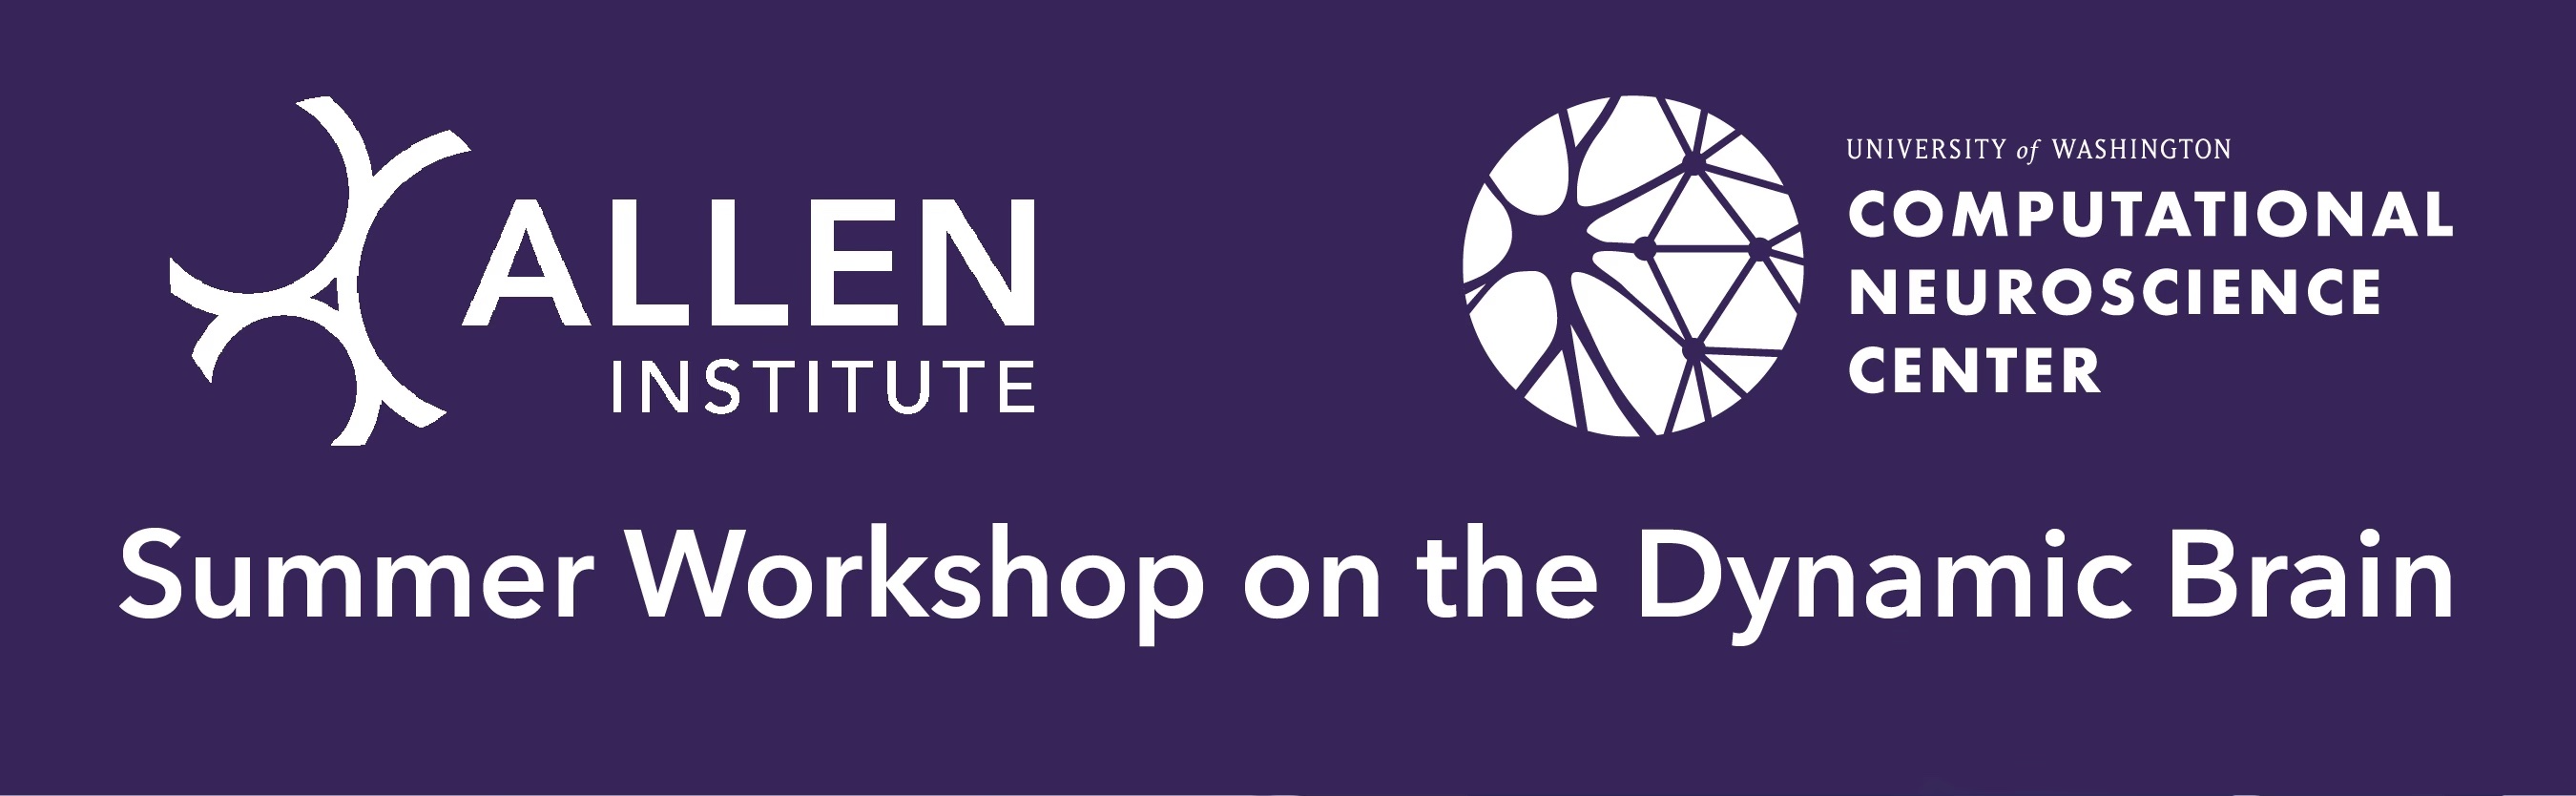

<h1 align="center">DAY 1 Workshop 1 SWDB 2025 </h1> 
<h3 align="center">Monday, August 25, 2025</h3> 
<h3 align="center">Introduction to the SWDB Datasets (AllenSDK)</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2>Objectives</h2>

    
In this workshop, we will briefly introduce the datasets made available for SWDB, walking through how to load, find, and access the data and metadata. After working through the material, you will learn: 
* how to use AllenSDK and pynwb to load and access data stored in Neurodata Without Borders (NWB) files
* how to use the metadata and the SWDB Data Book to find more information about the datasets 


<h3>Data Access: AllenSDK and pynwb</h3>
    
The SWDB datasets are packaged as NWB files, a standardized data format for neurophysiology data. We'll show you 2 Python toolkits for accessing NWB files: PyNWB and AllenSDK. PyNWB is the official API for NWB files while the AllenSDK is a Python package developed for accessing Allen Brain Atlas data (including the Brain Observatory datasets). This workshop is split into 2 Code Ocean capsules with the corresponding environment setup and attached datasets for each toolkit. You can use these capsules as templates for your own work, depending on the dataset you choose to work with. 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h3>AllenSDK</h3>

This capsule is focused on how to use the AllenSDK to programmatically access data and metadata from the Visual Coding and Visual Behavior projects. We'll explicitly show the data access patterns to load and plot data from one project, Visual Behavior Ophys, but many of the tools are generalizable. For more details on AllenSDK, refer to the [documentation](https://allensdk.readthedocs.io/en/latest/).  
    

<h3>Allen Brain Observatory Datasets </h3> 
    
The Allen Brain Observatory encompasses 4 projects that survey visual responses across multiple cortical areas and layers using optical physiology (two-photon calcium imaging) or extracellular electrophysiology (Neuropixels) recordings. Broadly, these datasets are used to investigate how sensory information is processed in the mouse visual cortex. 

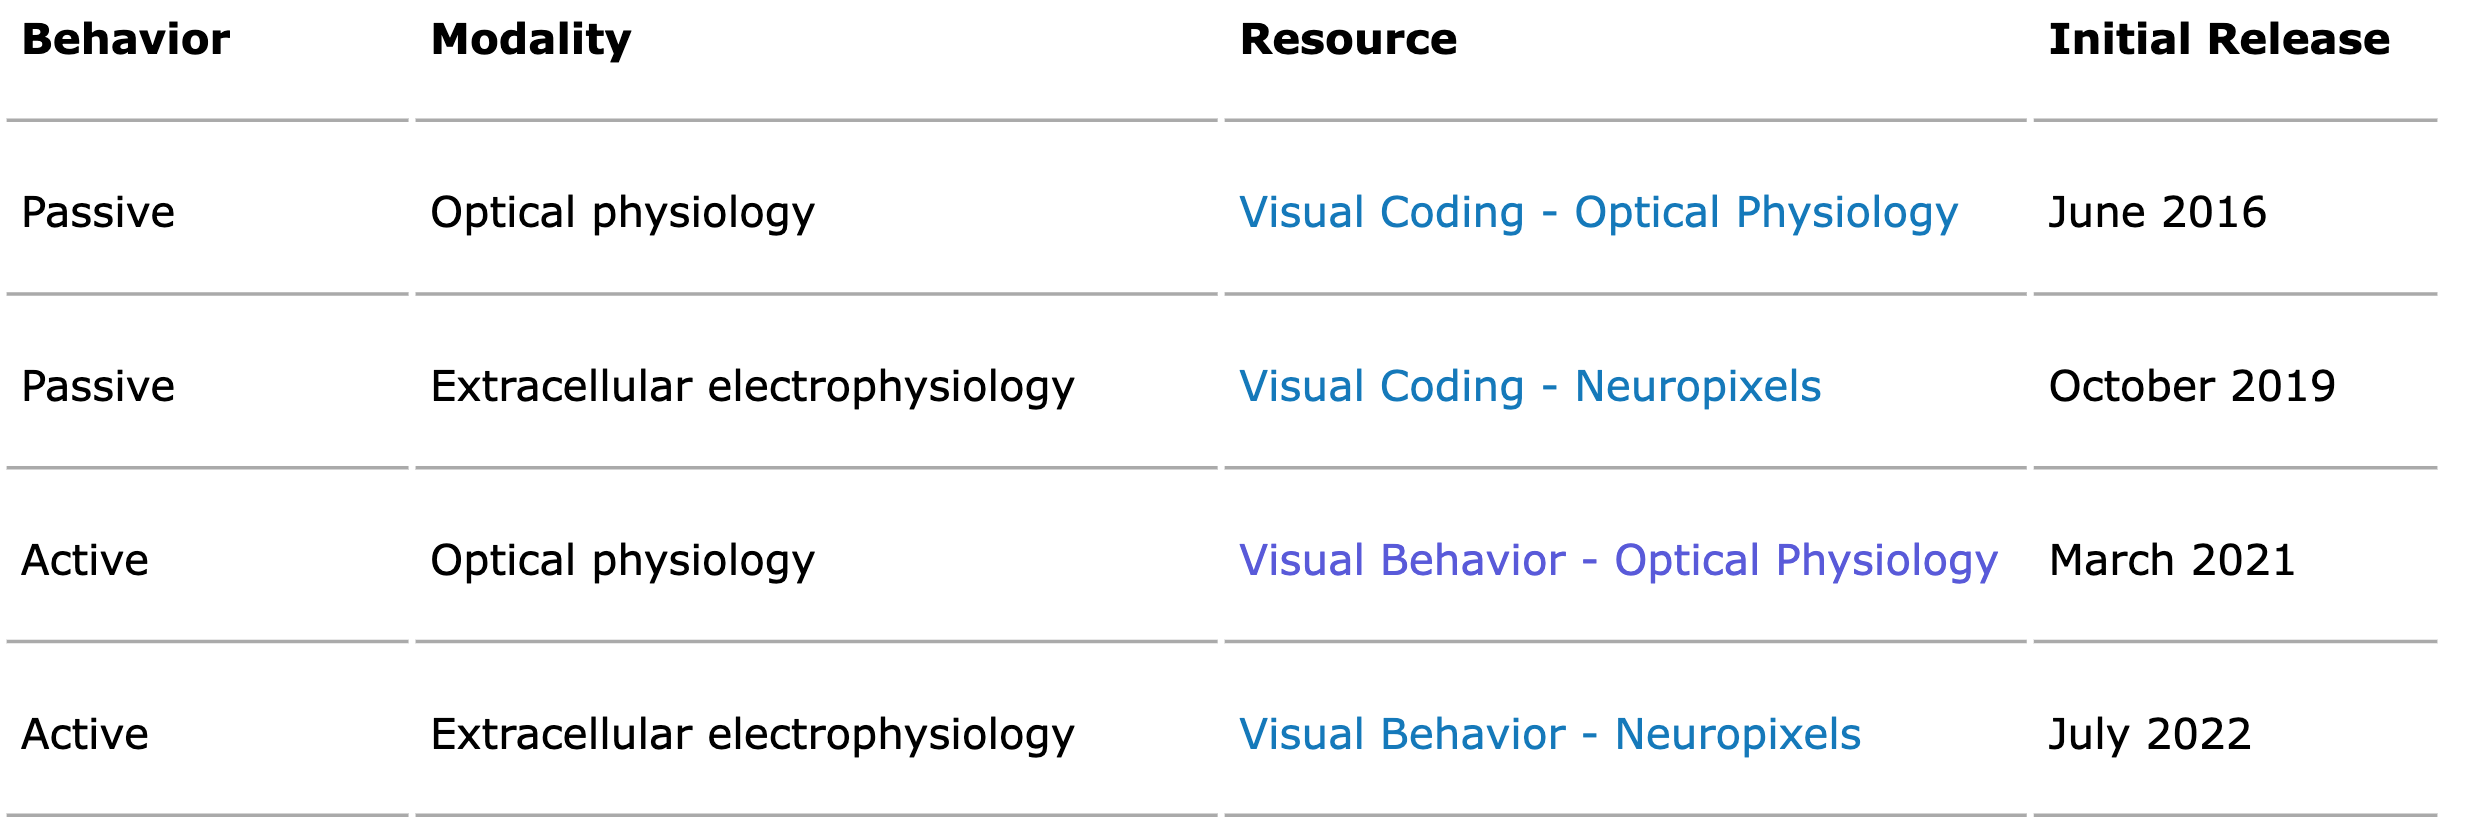


<h2>Visual Behavior 2p (Ophys)</h2>
    
In this tutorial, we'll show how to use the AllenSDK to access the data and metadata for the Visual Behavior Ophys project, in which in vivo 2-photon calcium imaging was used to measure the activity of inhibitory and excitatory neurons in visual cortex while mice performed a go/no-go visual change detection task. This dataset can be used to evaluate the influence of experience, expectation, and task engagement on neural coding and dynamics in excitatory and inhibitory cell populations.

<h3>Change Detection Task</h3>
    
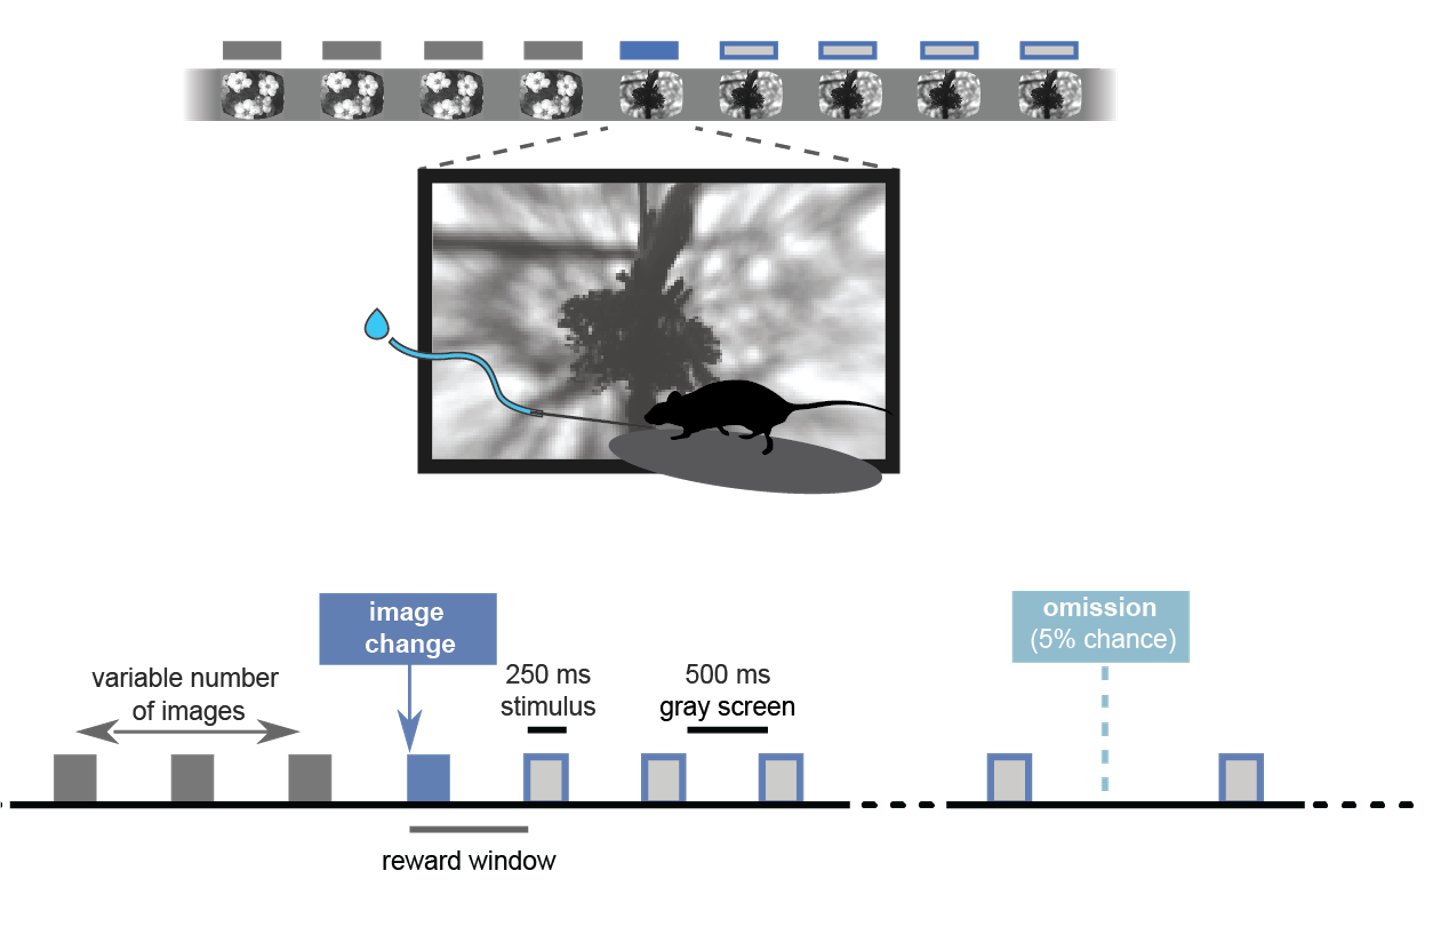


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Summer Workshop on the Dynamic Brain Data Book </h2> 

The databook is a resource for understanding the various dimensions of the datasets, the methods used, and how to access the data. You can find the pages for the Visual Behavior Ophys dataset here: https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Using AllenSDK to load the data </h2> 
Using the Python objects we'll show you below, you can extract information about this dataset such as which genetically defined cell populations were imaged, which session types are available, and how to find the same neurons across multiple sessions. 

The available data for each session includes: 
- Calcium fluorescence traces and deconvolved events representing neural activity
- Average projection images of 2-photon movies to visualize spatial organization of recorded neurons
- Stimulus presentation times, including times of image changes and image omissions
- Running speed and pupil area as measures of arousal and behavioral state
- Licking responses and reward times associated with task performance

</div>

In [ ]:
# general imports 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

import allensdk

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the Project Cache</h2> 
    
The code below shows how to use the VisualBehaviorOphysProjectCache class to load metadata tables and explore the features of the dataset. 

In [ ]:
# import behavior project cache class to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache_dir = '/root/capsule/data/'

cache = VisualBehaviorOphysProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=True)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Accessing the Project Metadata</h2>
Instatiating the cache downloads the 4 project metadata files, which are CSVs with summarized information about the behavior, recording sessions, and experiments. 
    
Project Metadata Files: 
1. ophys_experiment_table.csv
2. ophys_cells_table.csv 
3. behavior_session_table.csv 
4. ophys_session_table.csv 
    
Each CSV contains information related to its file name. See the schematic below for information about sessions vs experiments vs containers. These distinctions will be important for parsing the metadata. 

<h2>Sessions (Behavior and Ophys) vs Experiments </h2>  
    
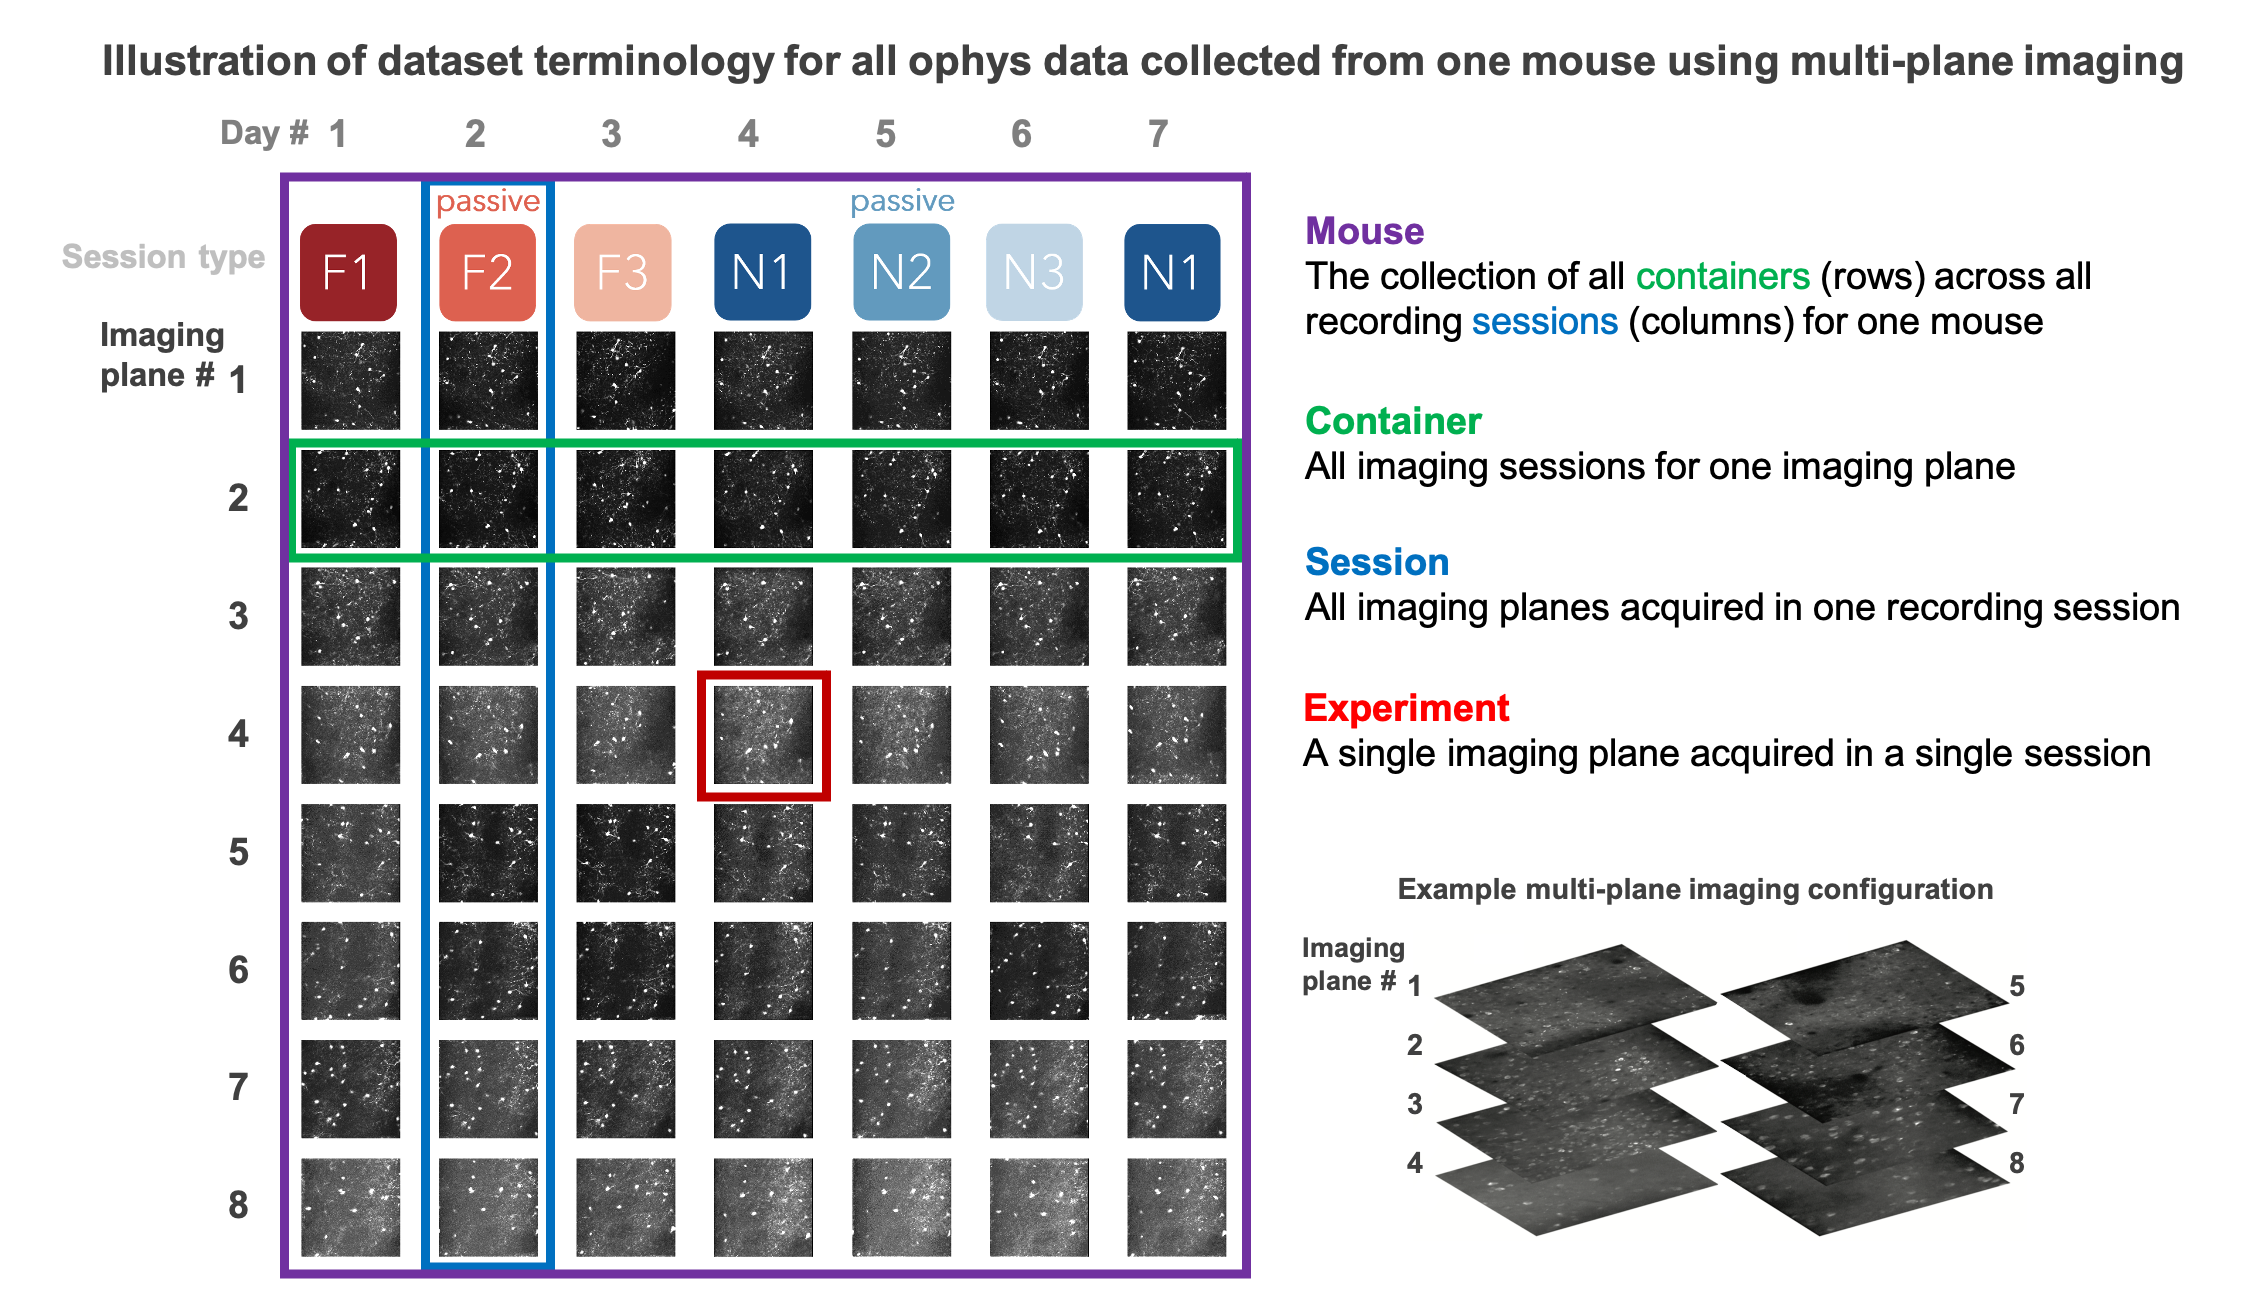


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the ophys experiment table</h2>

The AllenSDK has specific accessor methods to load the CSVs and return a pandas DataFrame with a row for each item and column for each metadata metric. 
    
Let's load the ophys_experiment_table.csv using the `get_ophys_experiment_table` method.  


In [ ]:
ophys_experiment_table = cache.get_ophys_experiment_table() 
ophys_experiment_table.head()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Note that each row has a unique ophys experiment id, which represents a single imaging plane in a single recording session. 
    
The first 4 columns contain other numerical ids that we can use to relate this experiment with the behavior session, the ophys session, the ophys container, and the mouse. Looking at the list of column names, we can see that this table contains aggregated information about all of these aspects of the data: behavior, mouse, and imaging session.  

In [ ]:
ophys_experiment_table.columns

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Ophys Cells Table</h2>  

The same population of neurons were targeted across multiple recording sessions, allowing us to track the activity of single neurons across days. The imaging planes across sessions were registered so that we could identify the same neuron across recording sessions. Each neuron in each session was given a `cell_roi_id`. If that neuron was tracked across a container (multiple imaging sessions), then that neuron was given a `cell_specimen_id`. 
    
These IDs are stored in the ophys_cells table, which is accessible using the `get_ophys_cells_table()` method.


In [ ]:
ophys_cell_table = cache.get_ophys_cells_table()
ophys_cell_table

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

To get the metadata for each cell, such as what brain region and imaging depth it was recorded in, we need to merge it with the `ophys_experiment_table`.

In [ ]:
# Let's merge the ophys cells table and experiments table
ophys_cell_table = ophys_cell_table.merge(ophys_experiment_table, on='ophys_experiment_id')

# Now we have experiments and cells together
ophys_cell_table.columns

In [ ]:
# Note that each row now represents each session ROI instead of experiment
print(f"Length ophys_cells: {len(ophys_cell_table)}") 

print(f"Length ophys_experiments: {len(ophys_experiment_table)}") 


In [ ]:
# How many unique neurons were imaged in the primary visual cortex? 
print(f"Unique cells recorded in VISp: {len(ophys_cell_table[ophys_cell_table.targeted_structure=='VISp'].cell_specimen_id.unique())}") 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Visual Behavior Ophys Projects</h2>  

The Visual Behavior Ophys project contains several dataset variants which used different imaging configurations and stimulus sets. The project metadata files aggregate data across the projects, identifiable using the `project_code` column in the DataFrame. 
    
Look at the unique project names in the `project_code` column of the ophys experiments table. 

In [ ]:
ophys_cell_table.project_code.unique()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Dataset Variants</h2>
    
The datasets vary by the number of imaging planes (single or multiple), the targeted structures, and the stimulus set. 
    
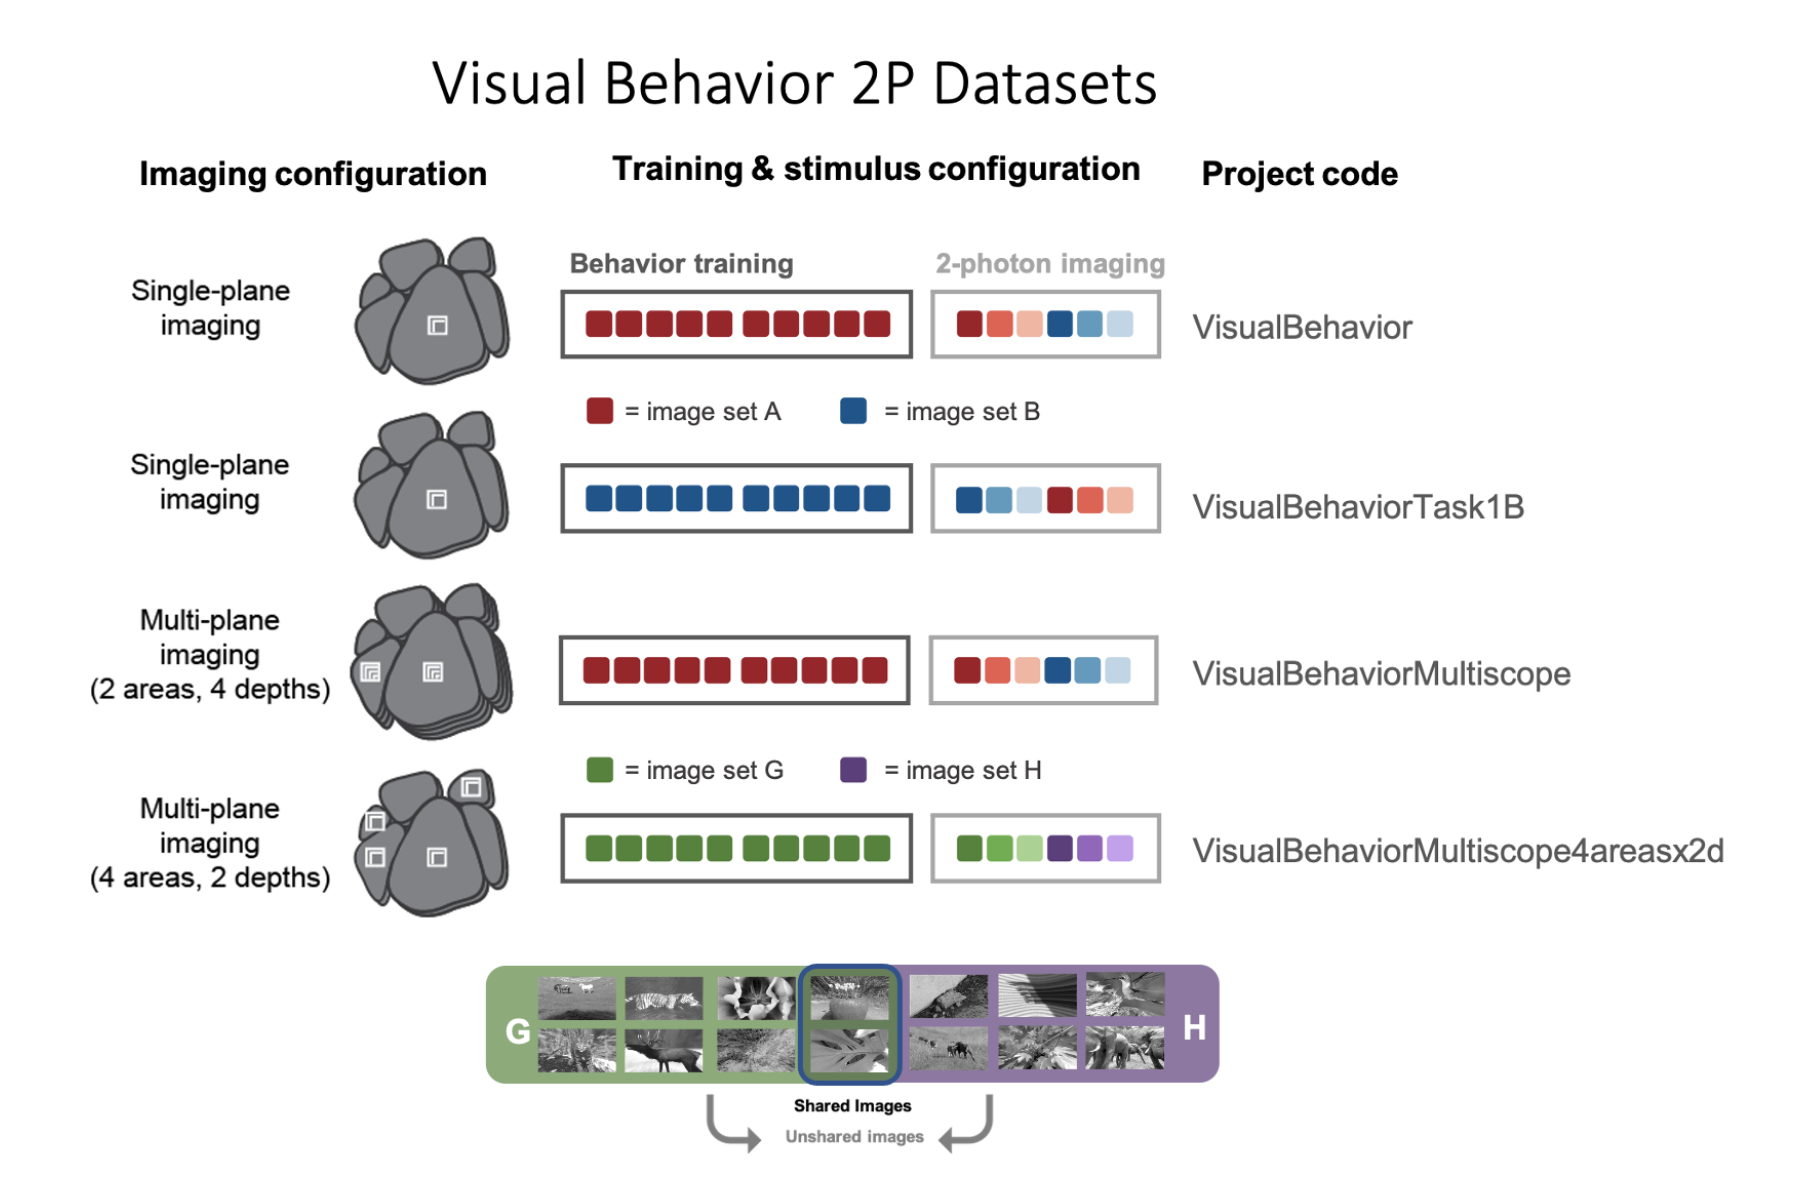
    
<br><br>
    
We can use the ophys_experiment table to identify differences across the dataset variants. For example, we can compare the `targeted_structure` and the `image_set` columns to tell us what brain regions were recorded from and what sets of images were presented to the mouse. 


In [ ]:
# Compare the targeted structure between the dataset variants 

print(f"Visual Behavior: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehavior'].targeted_structure.unique()}")
print(f"Visual Behavior Task1B: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorTask1B'].targeted_structure.unique()}")
print(f"Visual Behavior Multiscope: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope'].targeted_structure.unique()}")
print(f"Visual Behavior Multiscope 4areasx2d: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope4areasx2d'].targeted_structure.unique()}")

In [ ]:
# Compare the image set between the dataset variants 

print(f"Visual Behavior: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehavior'].image_set.unique()}")
print(f"Visual Behavior Task1B: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorTask1B'].image_set.unique()}")
print(f"Visual Behavior Multiscope: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope'].image_set.unique()}")
print(f"Visual Behavior Multiscope 4areasx2d: {ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope4areasx2d'].image_set.unique()}")

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Single plane vs multi-plane</h2> 

To distinguish single-plane from multi-plane datasets, we can see how many experiments (imaging planes) are in a session. 

In [ ]:
# Select a session id from a single plane and a multi plane dataset 
single_plane_session = ophys_cell_table[ophys_cell_table.project_code == 'VisualBehavior'].ophys_session_id.iloc[0]
multi_plane_session = ophys_cell_table[ophys_cell_table.project_code == 'VisualBehaviorMultiscope'].ophys_session_id.iloc[0]

# Count how many experiments are in a session (ie how many imaging planes in a recording session) 

print(f"Num experiments in single plane: {len(ophys_cell_table[ophys_cell_table.ophys_session_id == single_plane_session].ophys_experiment_id.unique())}")

print(f"Num experiments in multi plane: {len(ophys_cell_table[ophys_cell_table.ophys_session_id == multi_plane_session].ophys_experiment_id.unique())}")

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Find dataset features</h2>
    
From this point, let's focus on the **Visual Behavior** project. This is a single-plane dataset. Using the metadata, let's explore different features of the dataset. 

In [ ]:
# Filter DataFrames for Visual Behavior project 

project = 'VisualBehavior' 
filtered_ophys_cell_table = ophys_cell_table[ophys_cell_table.project_code == project] 
filtered_ophys_cell_table.head()

In [ ]:
filtered_ophys_cell_table.columns

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many mice were used in this dataset?
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many sessions? 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What transgenic lines were used in this dataset? What cell types do these lines refer to? 
    
For help, refer to the list of [transgenic lines](https://allenswdb.github.io/background/transgenic-tools.html) in the Data Book 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    
**Exercise:** What structures were targeted? 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many unique cells were recorded in this dataset? 
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Ophys Sessions and Behavior Sessions Tables</h2>  

We won't go into detail on the other project metadata files as the information in these tables greatly overlaps with the ophys experiments table. The ophys sessions table contains the same information as the ophys experiment table, but is organized by session instead of experiment. 
    
The behavior sessions table contains metadata for all imaging sessions and all behavior training sessions, where no imaging was performed. Thus, all imaging sessions have behavior information, but not all behavior sessions have 2-photon imaging information. 
    
Refer to the [Visual Behavior Ophys Dataset](https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-Dataset.html) page of the Data Book for more details. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Select an experiment and load the data</h2>       

Now that we've learned a bit about the dataset features, let's load the data for an experiment of interest. 

We can use the `get_ophys_experiment()` method to return a python object containing all the data and metadata for an experiment using the `ophys_experiment_id`. We can select an experiment of interest by filtering the `ophys_experiments` table based on specific experimental conditions. 

Let's look at the neural activity from Somatostatin neurons, an inhibitory cell type, and focus on sessions in which novel images were shown. We need to filter by: **driver line** (Sst-IRES-Cre) and **prior_exposures_to_image_set** (0, indicating this is a novel presentation) 
    

In [ ]:
selected_cell_table = filtered_ophys_cell_table[(filtered_ophys_cell_table.cre_line=='Sst-IRES-Cre') &
                        (filtered_ophys_cell_table.prior_exposures_to_image_set==0)]

print('Number of experiments: {}'.format(len(selected_cell_table.ophys_experiment_id.unique())))
selected_cell_table.head()

In [ ]:
# select an experiment id from the table 
ophys_experiment_id = 965228792

# load the data for this ophys experiment from the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Inspect the experiment object attributes</h4>
    
Using the `list_data_attributes_and_methods()` method will show us all of the attributes of the `ophys_experiment` object. 

In [ ]:
ophys_experiment.list_data_attributes_and_methods()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Experiment Metadata</h4>
 
The metadata attribute will output metadata for this specific experiment. 

In [ ]:
ophys_experiment.metadata

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What is the ophys sampling rate? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h4>Segmented ROIs</h4>
    
Regions of interest (ROIs) of the neuron cell bodies are segmented from the 2-photon movies and represented as segmentation masks. Let's compare the max projection image of the 2-photon movie with the segmented masks to assess the segmentation quality. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

How many cells do you see in the max projection? How does it compare to the segmented ROI masks? 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ophys_experiment.max_projection, cmap='gray')
ax1.set_xlabel('X') 
ax1.set_ylabel('Y')
ax2.imshow(ophys_experiment.segmentation_mask_image)
ax2.set_xlabel('X')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can access the individual segmented ROI masks through the `cell_specimen_table`, which contains metadata about each ROI mask and the masks themselves, a sparse HxW boolean array. 

In [ ]:
ophys_experiment.cell_specimen_table.head()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Quality Control: Valid ROIs </h2>
    
Each ROI mask is passed through a classifier that detects valid cells. Note that all the inputs in the `valid_roi` column of the `cell_specimen_table` are True. This dataset has already been QC filtered and only valid ROIs are shared here. 

In [ ]:
ophys_experiment.cell_specimen_table.valid_roi.unique()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Neural Activity Timeseries: DF/F</h2>
    
After ROIs are segmented, the average fluorescence value is calculated for each ROI then baseline subtracted and normalized to yield the change in fluorescence over baseline (df/f). These are the cell activity traces typically used for analysis.
    
    
The `dff_traces` table is organized by both `cell_specimen_id` and `cell_roi_id`.

In [ ]:
# Get fluorescence traces 

dff_traces = ophys_experiment.dff_traces
dff_traces.head()

In [ ]:
# You can get a matrix of dff traces by using np.hstack on the value of the dff column
dff_traces_array = np.hstack(dff_traces['dff'].values)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h4>Events</h4>
    
Events are computed for each cell as described in [Giovannucci et al. 2019](https://pubmed.ncbi.nlm.nih.gov/30652683/). The magnitude of events approximates the firing rate of neurons with the resolution of ~200ms. The biggest advantage of using events over dff traces is that they exclude prolonged calcium transients that may contaminate neural responses to subsequent stimuli. You can also use `filtered_events`, which are events convolved with a filter created using `stats.halfnorm` method to generate a more continuous trace of activity

In [ ]:
# Get deconvolved events 
events = ophys_experiment.events 
events.head()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h4>Timestamps</h4>
The last piece of data we need to plot the neural activity traces are the timestamps, measured in seconds. 

In [ ]:
# Get ophys timestamps 
ophys_timestamps = ophys_experiment.ophys_timestamps
ophys_timestamps 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How long is a session? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot Neural Activity Traces</h4>
    
Plot dff and events for one ROI. For visualization purposes, we'll select a 40s time window to plot. 

In [ ]:
# Plot dF/F and events for one cell 
# Note that we normalize the continuous traces 
roi = 0
initial_time = 380
final_time = 420

fig, ax = plt.subplots(figsize=(15, 3.5))

# plot dF/F, normalized by the max value
ax.plot(
    ophys_timestamps, 
    dff_traces.iloc[roi]['dff'] / dff_traces.iloc[roi]['dff'].max(), 
    color='blue', label='dF/F'
)
# plot events - normalizing by max 
ax.plot(
    ophys_timestamps, 
    events.iloc[roi]['events'] / events.iloc[roi]['events'].max(),
    color='orange', label='events'
)

# legend outside to the right
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

ax.set_ylabel('Normalized response magnitude')
ax.set_xlabel('Time (seconds)')
ax.set_xlim([initial_time, final_time])

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # make space for legend
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Stimulus Presentations</h2>
    
The stimulus presentations table contains one entry for each visual stimulus that was presented during the session, along with important metadata about the stimulus. 

In [ ]:
stimulus_table = ophys_experiment.stimulus_presentations
stimulus_table.head()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What are the unique stimulus blocks presented in this dataset?


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity alongside stimuli</h4>

Let's replicate the plot of activity traces from above, now adding the timing of stimulus presentations as gray vertical bars

In [ ]:
# Plot dF/F and events for one cell with stimulus presentations
roi = 0
initial_time = 380
final_time = 420

fig, ax = plt.subplots(figsize=(15, 3.5))

# plot df/F
ax.plot(
    ophys_timestamps, 
    dff_traces.iloc[roi]['dff'] / dff_traces.iloc[roi]['dff'].max(), 
    color='blue', label='dF/F'
)
# plot events
ax.plot(
    ophys_timestamps, 
    events.iloc[roi]['events'] / events.iloc[roi]['events'].max(),
    color='orange', label='events'
)

# Add shaded regions for stimulus presentations 
for idx, stimulus in stimulus_table.iterrows():
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color='gray', alpha=0.25)

ax.set_ylabel('normalized response magnitude')
ax.set_xlabel('Time (seconds)')
ax.set_xlim([initial_time, final_time])

# legend outside to the right
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # make space for legend
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Behavior measurements</h2>
    
There are 4 behavior modalities collected alongside the 2p images: licks, rewards, running speed, and eye tracking. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** Use `?` to find more information about each modality. 


In [ ]:
?ophys_experiment.licks

In [ ]:
ophys_experiment.licks.head()

In [ ]:
?ophys_experiment.rewards

In [ ]:
ophys_experiment.rewards.head()

In [ ]:
?ophys_experiment.running_speed

In [ ]:
ophys_experiment.running_speed.head()

In [ ]:
?ophys_experiment.eye_tracking

In [ ]:
ophys_experiment.eye_tracking.head()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity with stimuli and behavior</h4>
    
Let's plot activity traces and stimuli again, now with an additional axis for behavior variables

In [ ]:
roi = 0
initial_time = 380
final_time = 420

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

# plot dF/F 
ax1.plot(ophys_timestamps, 
         dff_traces.iloc[roi]['dff']/dff_traces.iloc[roi]['dff'].max(), 
         color='blue', label='dF/F')

# plot events 
ax1.plot(ophys_timestamps, 
         events.iloc[roi]['events']/events.iloc[roi]['events'].max()
         , color='orange', label='events')

# plot stimulus presentations 
for idx, stimulus in stimulus_table.iterrows():
    ax1.axvspan(stimulus['start_time'], stimulus['end_time'], color='gray', alpha=0.25)
ax1.set_ylabel('Normalized response magnitude')
ax1.set_xlim([initial_time, final_time])
ax1.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

# plot running speed - normalized by max 
ax2.plot(
    ophys_experiment.running_speed.timestamps,
    ophys_experiment.running_speed.speed / ophys_experiment.running_speed.speed.max(), 
    '--', color = 'gray', label='running speed'
)

# plot pupil area - normalized by max 
ax2.plot(
    ophys_experiment.eye_tracking.timestamps,
    ophys_experiment.eye_tracking.pupil_width / ophys_experiment.eye_tracking.pupil_width.max(), 
    color = 'gray',label='pupil width'
)
# plot licks
ax2.plot(
    ophys_experiment.licks.timestamps,
    np.zeros_like(ophys_experiment.licks.timestamps),
    marker='o', color='black', linestyle='none', markersize=5, label='licks'
)

# plot rewards 
ax2.plot(
    ophys_experiment.rewards.timestamps,
    np.zeros_like(ophys_experiment.rewards.timestamps),
    marker='d', color='blue', linestyle='none', markersize=12, alpha=0.5, label='rewards'
)
ax2.set_xlim([initial_time, final_time])
ax2.set_ylabel('Normalized response magnitude')
ax2.set_xlabel('Time (seconds)')
ax2.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Summarizing the dataset features</h2>

Now that we've shown how to use the AllenSDK to access and find features about the Visual Behavior Ophys dataset, let's summarize what we've found. 
    
Here is a Google sheet where we'll document key information about the datasets:

[SWDB Dataset Features Spreadsheet](https://docs.google.com/spreadsheets/d/1zwqS97x81jEVUUMTLLtlk6NMMR2C7DhY9nJDB2BLvBE/edit?usp=sharing)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Class exercise:** 
    
- Split up into groups and select a Brain Observatory dataset (each group should have a different dataset). 
- Using the AllenSDK and the SWDB Data Book, try to fill out the SWDB Dataset Features Spreadsheet with information about your assigned dataset. 
- At the end, we'll come together and discuss what we've found, what we tried, what was difficult, and why we might care about each of the different features of the datasets. 


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Further Discussion:** 
    
Select a dataset and discuss: 
1. What interests you about the dataset? What are unique features that distinguish it from others? 
2. What are some scientific questions you could answer with this dataset? What are the next steps you would take to approach the question? 
2. Are there any limitations to consider or uncertainties to verify before working with this dataset? 
</div>